In [60]:
# dataset https://archive.ics.uci.edu/ml/datasets/auto+mpg

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = sns.load_dataset("mpg")

In [58]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [7]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [8]:
df.shape

(398, 9)

In [9]:
# check if null values exist
print(df.isna().any())
print(df.isnull().sum())

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [ ]:
print(df.cylinders.unique())
print(df.cylinders.nunique())

In [61]:
# evaluate how many rows are missing for horsepower
len(df[df.horsepower.isnull()])

6

In [62]:
df.cov()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,61.089611,-10.308911,-655.402318,-233.857926,-5505.211745,9.058930,16.741163
cylinders,-10.308911,2.893415,168.623214,55.348244,1290.695575,-2.370842,-2.193499
displacement,-655.402318,168.623214,10872.199152,3614.033744,82368.423240,-156.332976,-142.717137
horsepower,-233.857926,55.348244,3614.033744,1481.569393,28265.620231,-73.186967,-59.036432
weight,-5505.211745,1290.695575,82368.423240,28265.620231,717140.990526,-974.899011,-959.946344
acceleration,9.058930,-2.370842,-156.332976,-73.186967,-974.899011,7.604848,2.938105
model_year,16.741163,-2.193499,-142.717137,-59.036432,-959.946344,2.938105,13.672443


In [11]:
# take a look at the values
df.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [12]:
# check the data types
df.dtypes 

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [ ]:
def minmax(x):
    try:
        normal = (x - min(x)) / (max(x) - min(x))
        print(normal.head())
    except:
        return x
    return normal

normal_df = df.apply(minmax)

In [68]:
# standardize all ordinal/interval-scaled columns to a range from 0-1

# idea:
cols = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year"]
df_norm = df.copy()

for col in cols:
    min_value = df[col].min()
    max_value = df[col].max()    
    df_norm[col] = (df[col] - min_value) / (max_value - min_value)
    
df_norm.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,usa,chevrolet chevelle malibu
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,usa,buick skylark 320
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,usa,plymouth satellite
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,usa,amc rebel sst
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,usa,ford torino


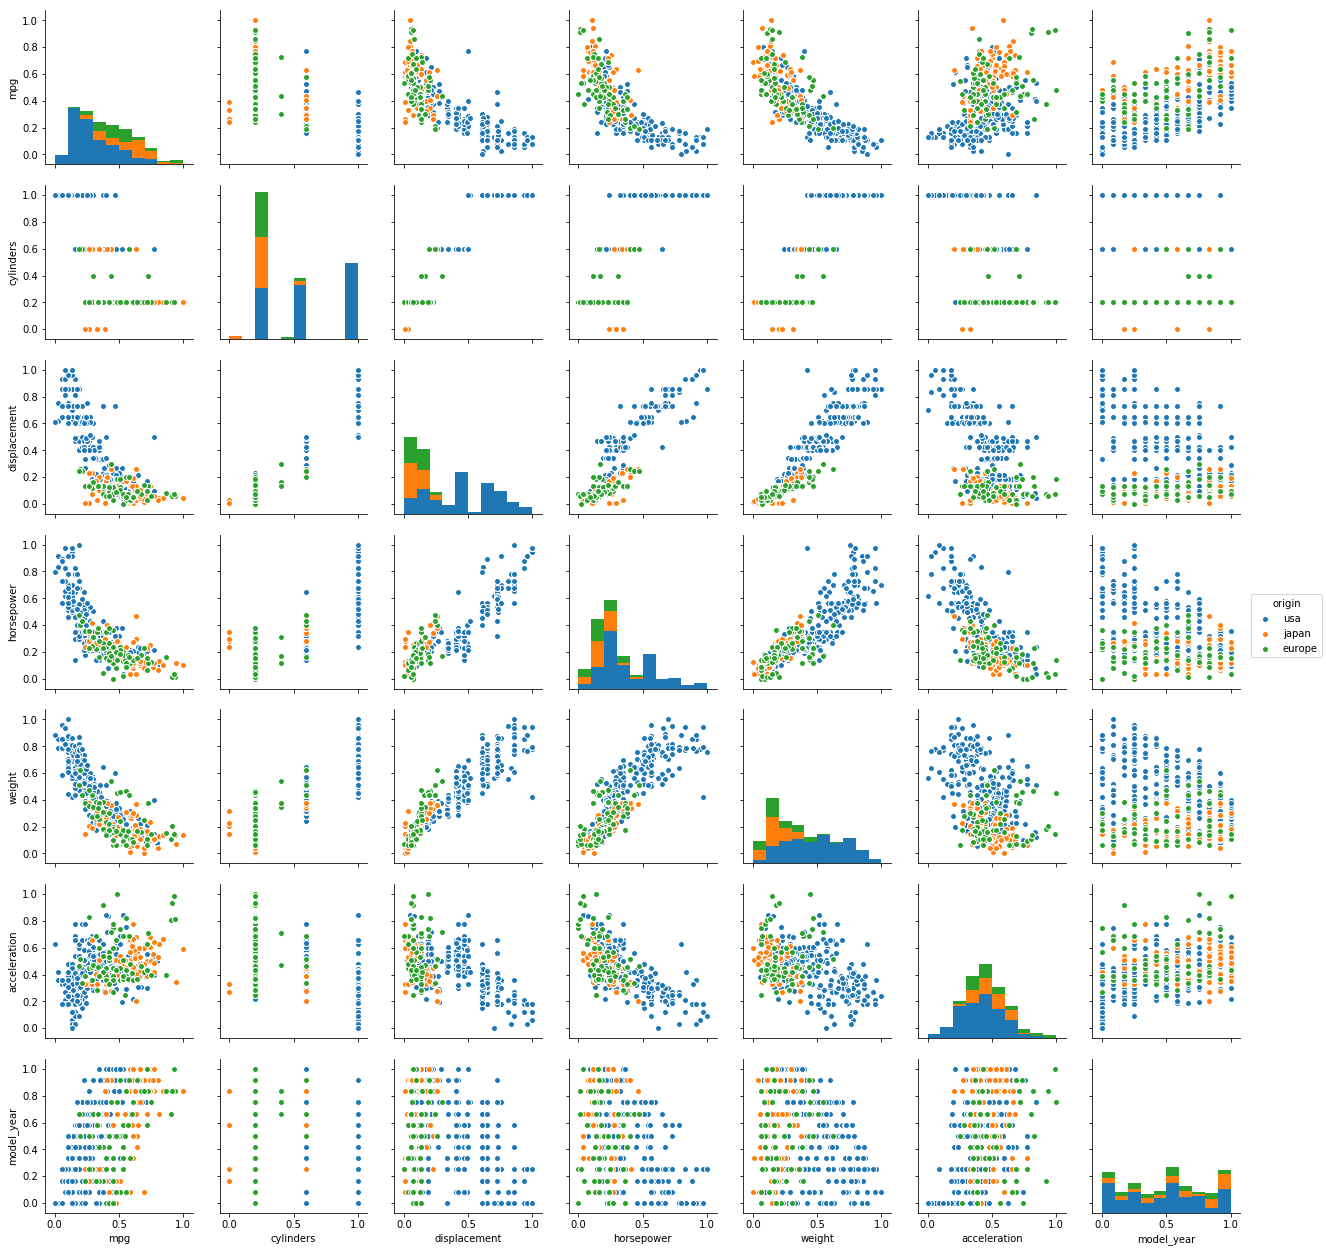

In [82]:
# remove name column (no predictive power)
df_norm_visualize = df_norm.drop(columns=["name"])

# remove nan-rows
df_norm_visualize = df_norm_visualize[~df_norm_visualize.horsepower.isna()]

# show a pairplot
sns.pairplot(df_norm_visualize, hue='origin')


In [83]:
df_norm_visualize.cov()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,0.043089,-0.055069,-0.045191,-0.033802,-0.041605,0.014431,0.036994
cylinders,-0.055069,0.116388,0.087712,0.060161,0.073741,-0.028274,-0.036199
displacement,-0.045191,0.087712,0.073115,0.050753,0.060756,-0.024147,-0.030700
horsepower,-0.033802,0.060161,0.050753,0.043761,0.043555,-0.023676,-0.026738
weight,-0.041605,0.073741,0.060756,0.043555,0.057998,-0.016485,-0.022853
acceleration,0.014431,-0.028274,-0.024147,-0.023676,-0.016485,0.026968,0.014635
model_year,0.036994,-0.036199,-0.030700,-0.026738,-0.022853,0.014635,0.094236


In [94]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


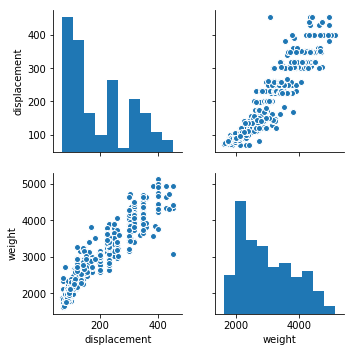

In [97]:
sns.pairplot(df, vars=['displacement', 'weight'])

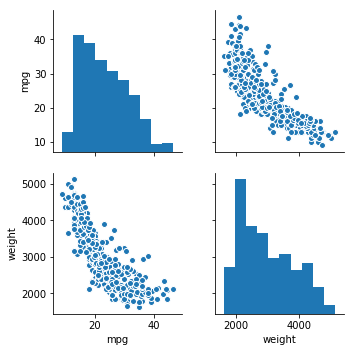

In [98]:
sns.pairplot(df, vars=['mpg', 'weight'])

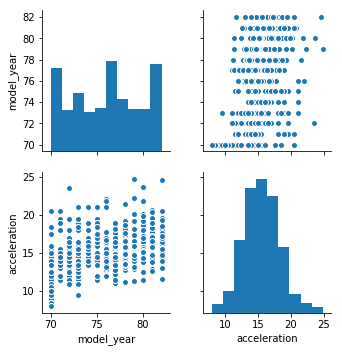

In [99]:
sns.pairplot(df, vars=['model_year', 'acceleration'])

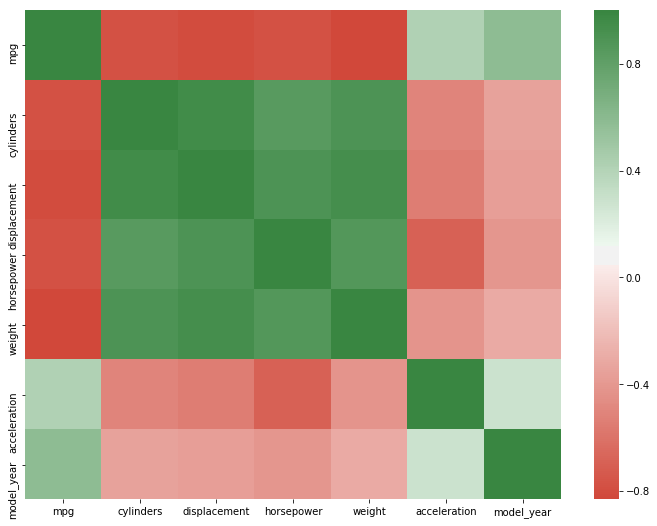

In [118]:
f, ax = plt.subplots(figsize=(12, 9))  # make the plot larger than default
cmap = sns.diverging_palette(15, 130, as_cmap=True)  # create a colormap from green (1) to red (-1)
sns.heatmap(df.corr(), cmap=cmap)  # create a heatmap for the correlation matrix 